<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week09-KNN/K-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-nearest neighbors

In [ ]:
# Example of getting neighbors for an instance
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        #if dist != 0.0:
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Test distance function
dataset = np.array([[1,2,0],
                    [1,2.5,0],
                    [7,2,1],
                    [3,2.3,1],
                    [4,2.1,1]])

test = np.array([[2,2]])

#plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=50, cmap='viridis')
#plt.show()
#print("Target = ",dataset[0])

#Your implementation
def voting(df_nearest, y_train):
  pass

[1. 2. 0.]
[1.  2.5 0. ]


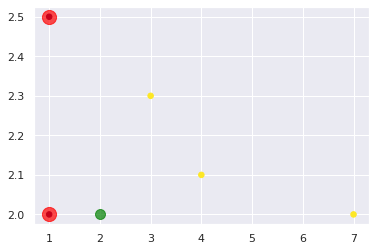

In [ ]:
neighbors = np.array(get_neighbors(dataset, test, 2))
for neighbor in neighbors:
    print(neighbor)

plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
plt.scatter(neighbors[:, 0], neighbors[:, 1], c='red', s=200, alpha=0.7)
plt.scatter(test[0,0], test[0,1], c='green', s=100, alpha=0.7)
plt.show()

# SK-Learn

result =  (array([[1.        , 1.04403065, 1.11803399, 2.00249844]]), array([[0, 3, 1, 4]]))


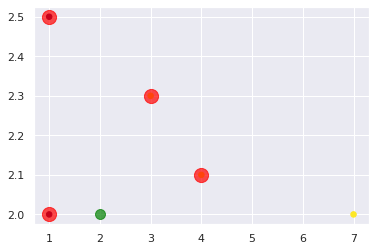

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(dataset[:, :2], dataset[:,2])

result = neigh.kneighbors(test)
print("result = ",result) #distance and index

#Plot all points
plt.scatter(dataset[:, 0], dataset[:, 1],c = dataset[:,2], s=30, cmap='viridis')
#Plot neighbors
plt.scatter(dataset[result[1][0:], 0], dataset[result[1][0:], 1], c='red', s=200, alpha=0.7)
#Plot target
plt.scatter(test[0,0], test[0,1], c='green', s=100, alpha=0.7)
plt.show()


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(dataset[:, :2], dataset[:,2])
answer = knn.predict(test)
print(answer)

[1.]


# K-NN with real data

In [ ]:
from sklearn import datasets
data = datasets.load_iris()
print(data.DESCR)
print(data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

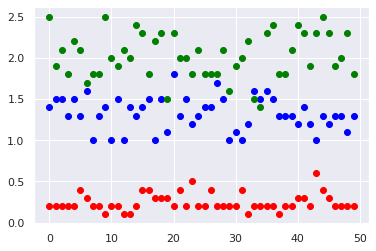

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)
plt.scatter(x,data.data[:50,3],color='red') #petal width of Setosa
plt.scatter(x,data.data[50:100,3],color='blue') #petal width of Versicolour 
plt.scatter(x,data.data[100:,3],color='green') #petal width of Virginica

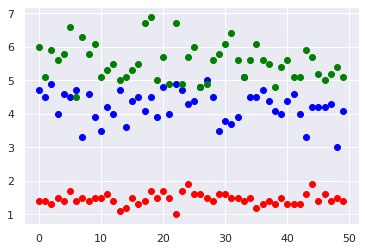

In [ ]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target) #petal length + width
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
answer = knn.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target)

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(3,11)}

knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
print(knn_best.best_params_)
print(knn_best.best_estimator_)
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.data[:,2:4])
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42,stratify=data.target)

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(3,11)}

knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
print(knn_best.best_params_)
print(knn_best.best_estimator_)
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



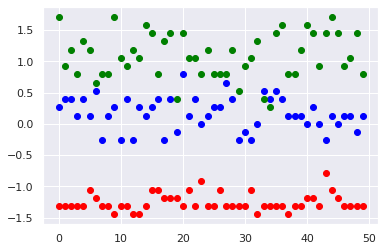

In [ ]:
plt.scatter(x,X[:50,1],color='red') #petal length of Setosa
plt.scatter(x,X[50:100,1],color='blue') #petal length of Versicolour 
plt.scatter(x,X[100:,1],color='green') #petal length of Virginica

If the data is normally distributed, then Standardization is the suitable method for the scaling purpose. On the other hand, if the data is not normally distributed, we go with Normalization scaling method